##**Attribute Information:**


**Bank client data:**

-  Age (numeric)

-  Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')


-  Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)


-  Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')


-  Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

-  Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

-  Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**

-  Contact: contact communication type (categorical:
'cellular','telephone')
-  Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
-  Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
-  Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.
**Other attributes:**
-  Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
-  Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
-  Previous: number of contacts performed before this campaign and for
this client (numeric)
-  Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
-  Social and economic context attributes
-  Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
-  Cons.price.idx: consumer price index - monthly indicator (numeric)
-  Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
-  Euribor3m: euribor 3 month rate - daily indicator (numeric)
-  Nr.employed: number of employees - quarterly indicator (numeric)
-  Output variable (desired target):
-  **y - has the client subscribed a term deposit? (binary: 'yes', 'no')**

З опису Датасета можемо дійти до висновку, що наша цільова змінна (target) - це **y**.

Мета: дослідити чи підпишеться клієнт на строковий депозит.


## Import libs


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency, kruskal
import os
sns.set(rc={'figure.figsize':(10, 8)});

## Data loading


In [ ]:
df = pd.read_csv('./bank--additional-full.csv', sep=';')

## Data understanding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Описова статистика по числовим змінним


In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'\nОписова статистика для змінної: {column}')
    print(df[column].value_counts())


Описова статистика для змінної: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Описова статистика для змінної: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Описова статистика для змінної: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Описова статистика для змінної: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Описова статистика для змінної: housing
housing
yes        21576
no     

## Візуалізація розподілів


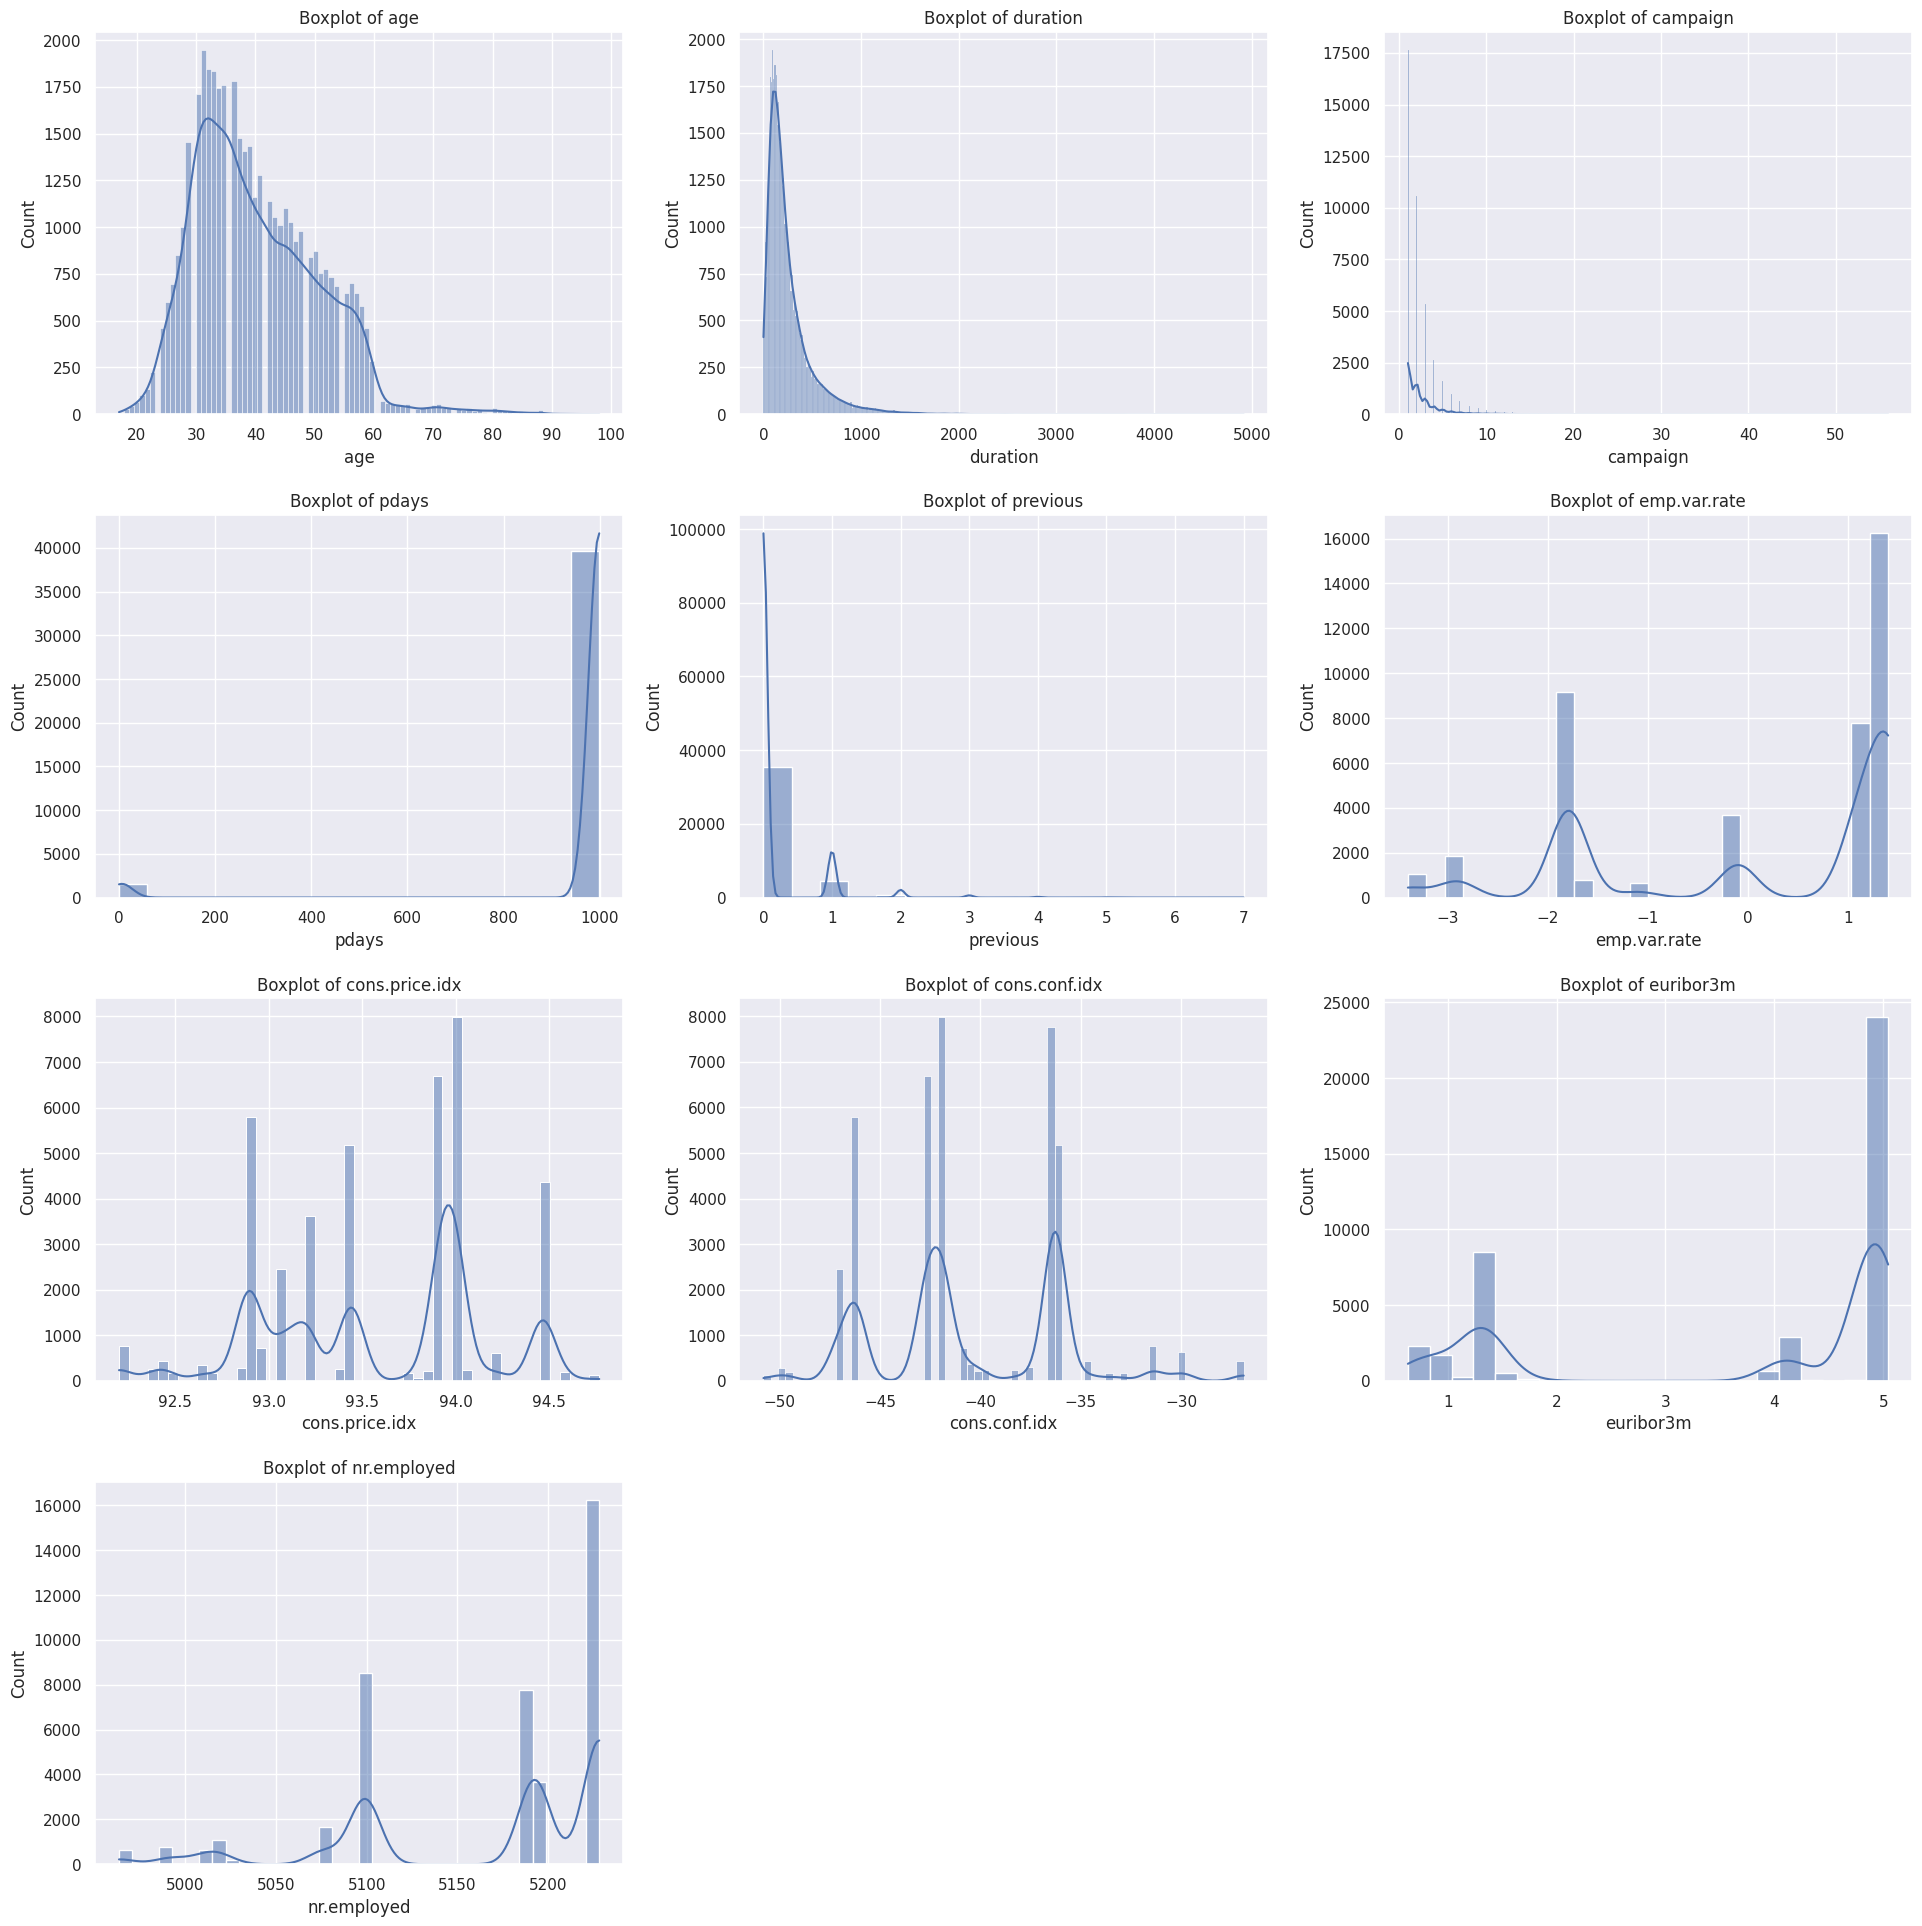

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 3
rows = (len(numeric_columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.histplot(x=df[column], ax=axes[row, col], kde = True)
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()

Зображення демонструє гістограми та щільність розподілу для кількісних змінних у вибірці, зокрема, характеристик клієнтів та економічних індикаторів у контексті банківської маркетингової кампанії.

### Розглянемо також інфографіку категоріальних змінних:

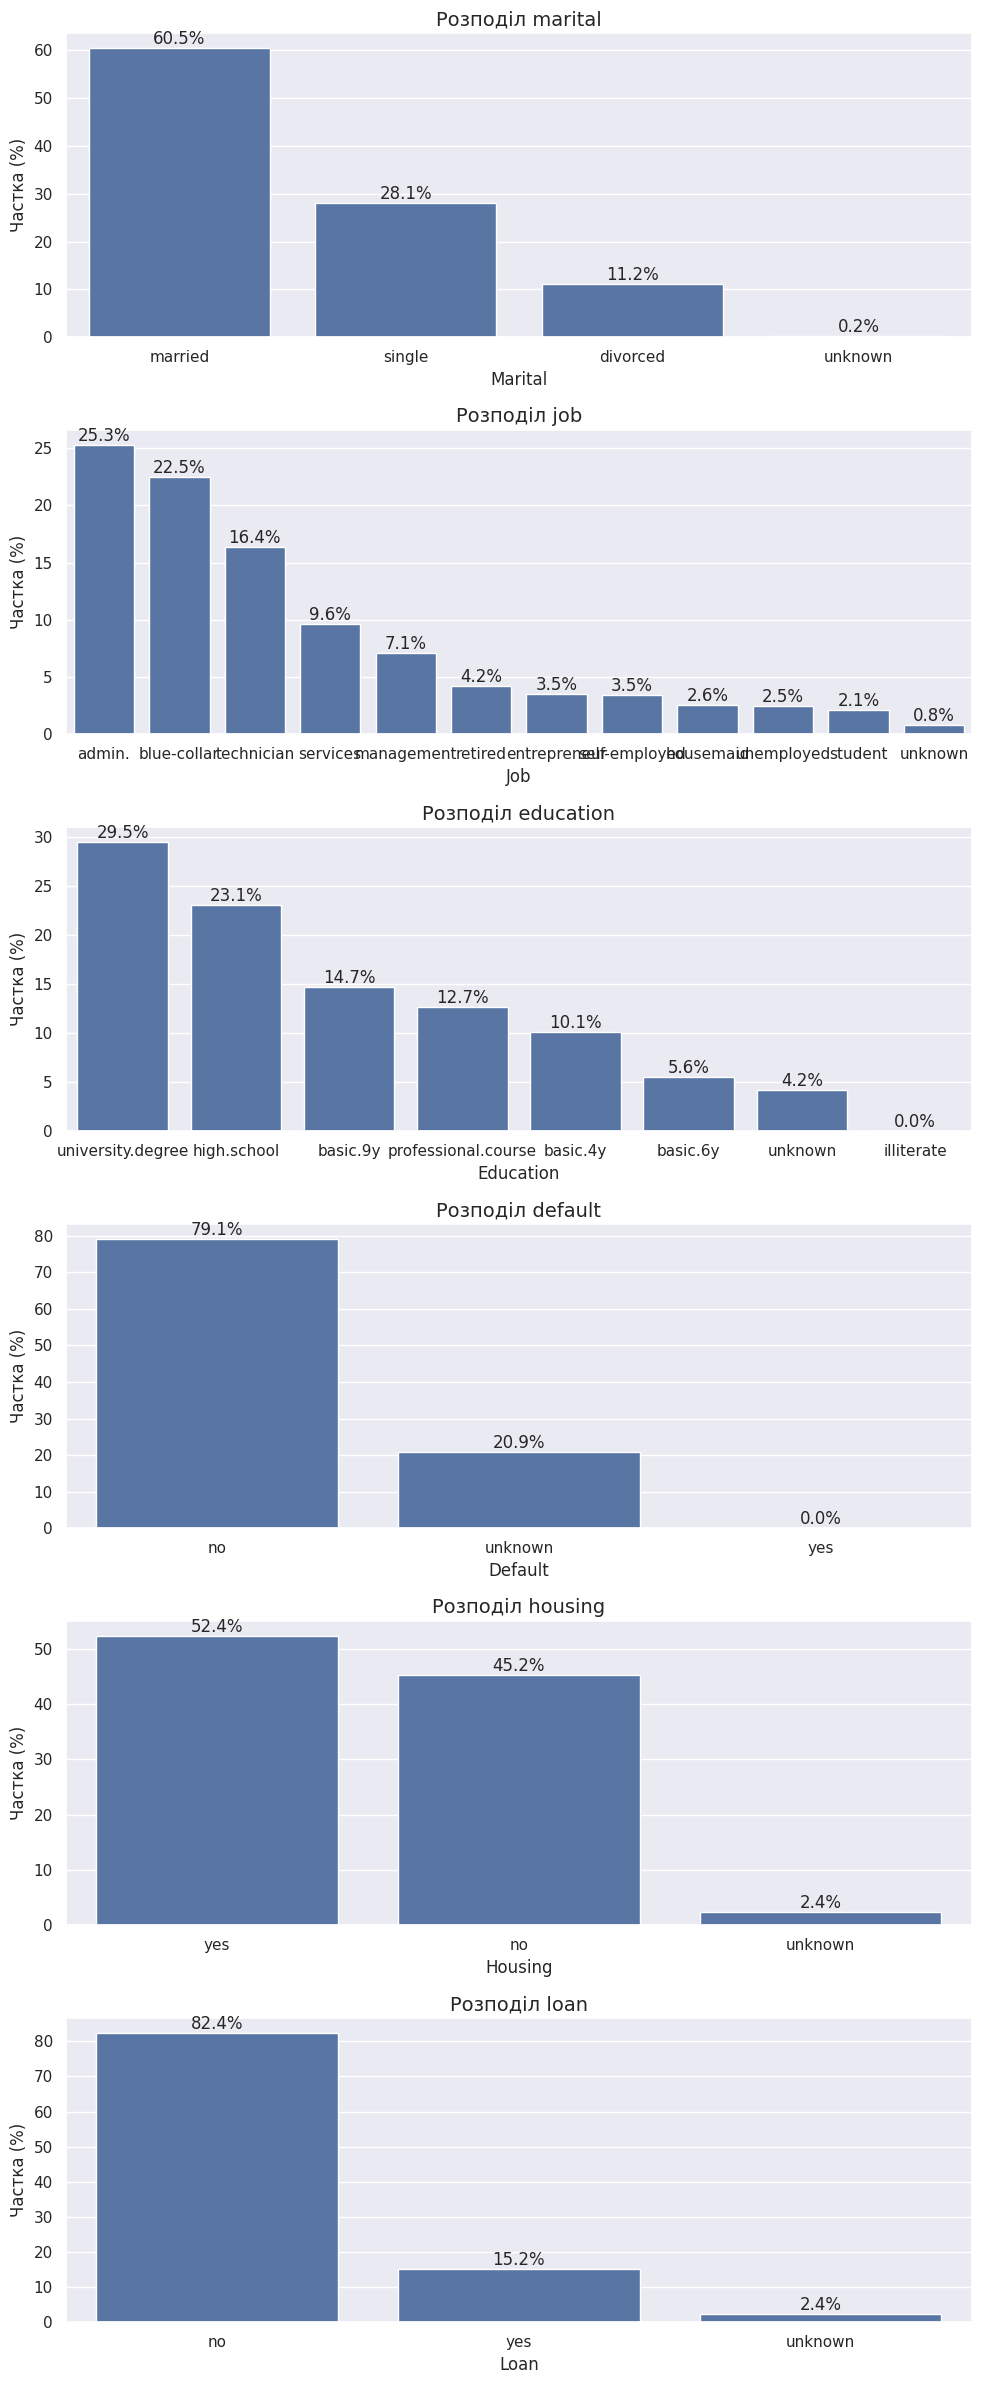

In [15]:
categorical_columns = ['marital', 'job', 'education', 'default', 'housing', 'loan']

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 4))

for i, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts(normalize=True) * 100
    sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values)

    axes[i].set_title(f"Розподіл {column}", fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel("Частка (%)", fontsize=12)
    axes[i].bar_label(axes[i].containers[0], fmt="%.1f%%")

plt.tight_layout()
plt.show()

Основна клієнтська база — це одружені особи з університетською освітою, що працюють у сферах адміністрації чи техніки.
Банк має низький рівень ризику через відсутність кредитних дефолтів у клієнтів.
Однак існує потенціал залучення менш активних груп, таких як розлучені, студенти, домогосподарки чи клієнти з базовою освітою, шляхом спеціально розроблених маркетингових кампаній.

## Дослідження та наявність викидів

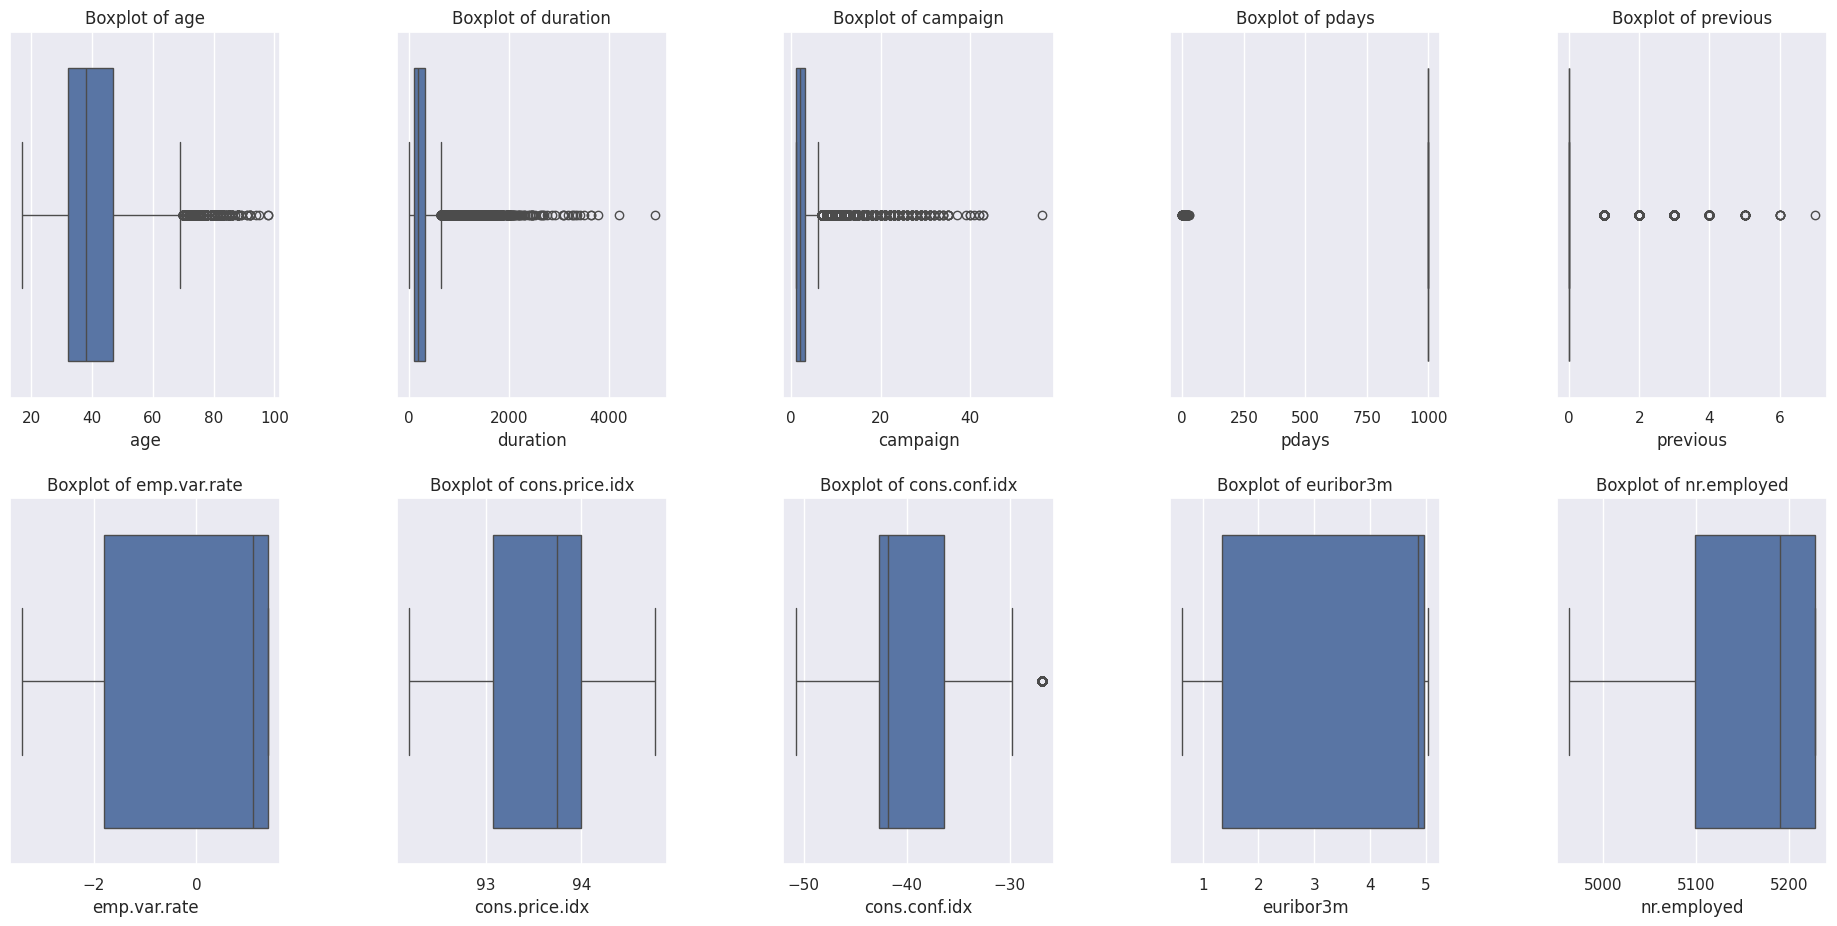

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 5
rows = (len(numeric_columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()

Цей аналіз показує наявність викидів серед кількісних змінних у нашому наборі даних:  

- **age** – більшість значень знаходяться в діапазоні приблизно 18–69 років, однак є поодинокі випадки після 70 років, які можуть бути рідкісними або зумовленими помилками введення.  
- **duration** – спостерігаються численні викиди, особливо для значень, що перевищують ~800 секунд, що вказує на клієнтів із дуже тривалим контактом і може значно впливати на середнє значення.  
- **campaign** – значення понад ~10 контактів є рідкісними випадками інтенсивного зв’язку з клієнтом.  
- **pdays** – після значення 10 є окремі викиди, що свідчить про клієнтів, які довгий час не контактували з банком.  
- **previous** – значення більше ніж 1 вважаються викидами, що свідчить про нечасті випадки багаторазового контакту з клієнтом у минулому.  
- **emp.var.rate, cons.price.idx, euribor3m, nr.employed** – ці змінні не мають виражених викидів, що свідчить про стабільний розподіл.  
- **cons.conf.idx** – спостерігаються окремі викиди на низьких рівнях, що може свідчити про періоди зниження довіри споживачів.

## Data cleaning & Analyzing relationships

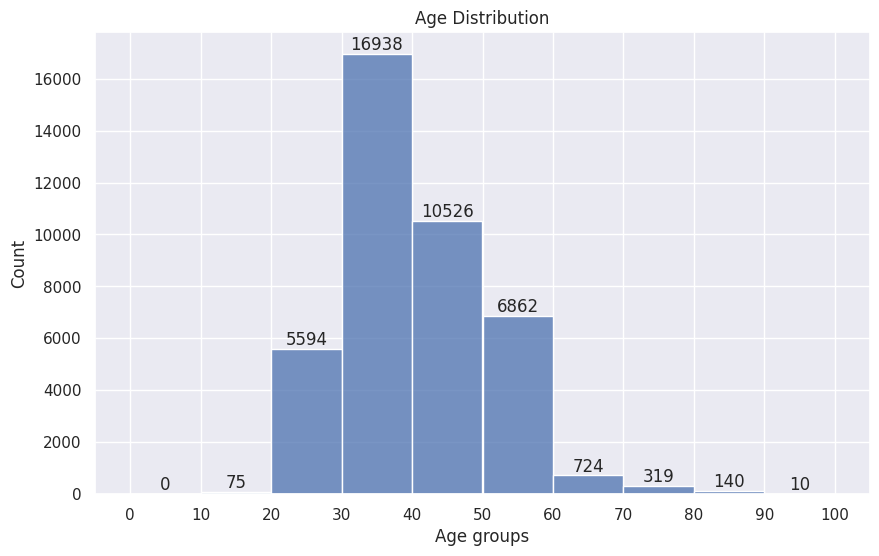

In [18]:
bins = np.arange(0, 101, 10)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=bins, kde=False)


for i in ax.containers:
    ax.bar_label(i, )

plt.xlabel('Age groups')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(bins)
plt.show()

Даний графік зображує кількість клієнтів за віковими групами (10 років). Можемо бачити, що найбільша кількість клієнтів (16933) є люди від 30 до 40 років

### Який середній вік неодружених клієнтів?

In [19]:
df[df['marital'] != 'married']['age'].mean()

36.523862238622385

### В який день тижня (ознака day_of_week) найчастіше дзвонили клієнтам, які відмовилися від депозиту?

In [20]:
clients_no_deposit = df[df['y'] == 'no']
day_of_week_counts = clients_no_deposit['day_of_week'].value_counts()

most_frequent_day = day_of_week_counts.idxmax()
print(f"Most of the failures on: {most_frequent_day}")

Most of the failures on: mon


### Побудуйте інфографіку за ознаками marital та y. Які висновки можна зробити?


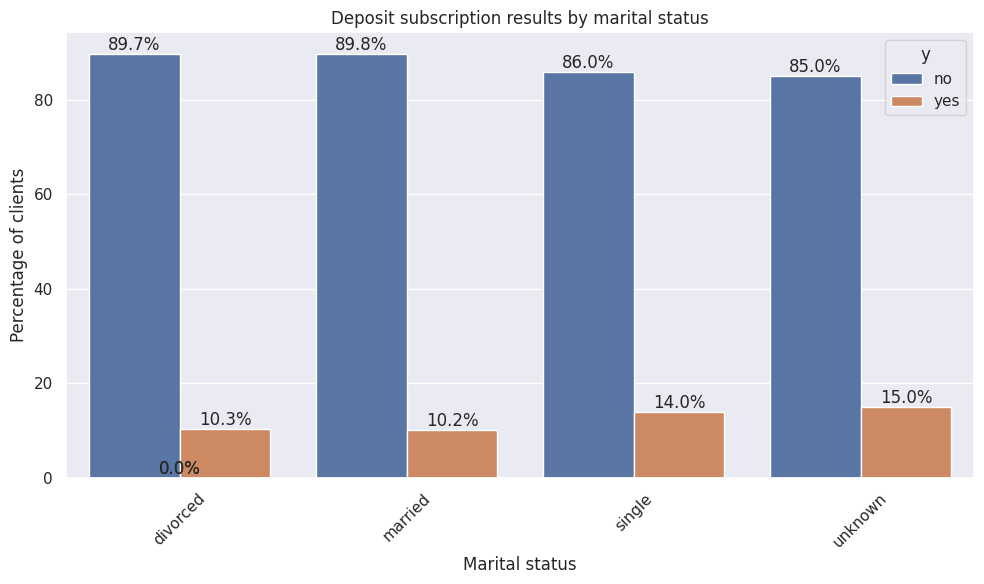

In [21]:
df_percent = df.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100

# Перетворюємо дані в довгий формат для побудови графіка
df_percent = df_percent.reset_index().melt(id_vars='marital', value_name='percentage')

# Побудова графіка з відсотками
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='marital', y='percentage', hue='y', data=df_percent)

# Додаємо анотації з відсотками
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Deposit subscription results by marital status')
plt.xlabel('Marital status')
plt.ylabel('Percentage of clients')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Це зображення дозволяє зробити висновок, що люди, які не перебувають у стосунках, підписують договір частіше, ніж одружені чи розлучені. Можливе пояснення цього явища: самотні можуть планувати майбутній шлюб, і контракт з банком може стати для них корисним фінансовим рішенням. Водночас частка одружених і розлучених у підписанні договору майже не відрізняється.

### Чи є зв'язок між наявністю кредиту (default) у клієнта та результатом? Побудуйте інфографіку.

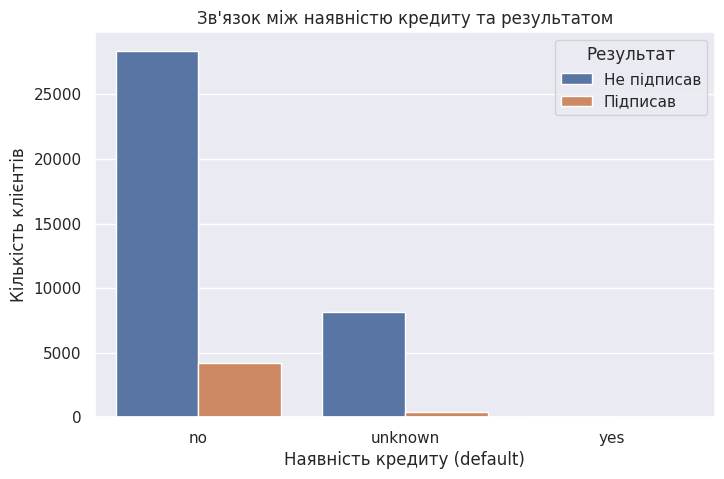

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="default", hue="y")

plt.xlabel("Наявність кредиту (default)")
plt.ylabel("Кількість клієнтів")
plt.title("Зв'язок між наявністю кредиту та результатом")
plt.legend(title="Результат", labels=["Не підписав", "Підписав"])

plt.show()

З аналізу графіка можна зробити такі висновки:  

- Клієнти, які **не мають кредиту (default = no)**, найчастіше контактували з банком, і серед них більше випадків підписання договору (y).  
- Ті, чий статус кредиту **невідомий (unknown)**, також представлені значною кількістю, але частка підписаних договорів серед них нижча.  
- Клієнти, які **мають кредит (default = yes)**, значно рідше підписують договір, що може свідчити про обережність банку або фінансові труднощі таких клієнтів.  

Загалом можна припустити, що наявність кредитних зобов’язань може негативно впливати на ймовірність підписання договору з банком.

In [34]:
contingency_table = pd.crosstab(df['default'], df['y'])
# χ²-тест
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
if p < 0.05:
    print("Є статистично значуща залежність між 'default' і 'y'.")
else:
    print("Немає статистично значущої залежності між 'default' і 'y'.")

Chi-squared: 406.5775146420093
P-value: 5.1619579513916376e-89
Degrees of freedom: 2
Expected frequencies:
 [[2.89168259e+04 3.67117413e+03]
 [7.62851209e+03 9.68487909e+02]
 [2.66203749e+00 3.37962513e-01]]
Є статистично значуща залежність між 'default' і 'y'.


### Візуалізуйте інформацію про рівень освіти залежно від середнього віку. Чи є статистично значущим взаємозв'язок між ними?

Перевіримо нормальність віку в кожній групі освіти за допомогою тесту Шапіро-Вілка:

In [41]:
from scipy.stats import shapiro

for level in df["education"].unique():
    stat, p = shapiro(df[df["education"] == level]["age"])
    print(f"{level}: p-value = {p:.5f}")

basic.4y: p-value = 0.00000
high.school: p-value = 0.00000
basic.6y: p-value = 0.00000
basic.9y: p-value = 0.00000
professional.course: p-value = 0.00000
unknown: p-value = 0.00000
university.degree: p-value = 0.00000
illiterate: p-value = 0.03817


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9515.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6045.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5243.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12168.
  res = hypotest_fun_out(*samples, **kwds)


p < 0.05, дані не є нормальними → краще використовувати Краскела-Уолліса.

In [46]:
stat, p = kruskal(*groups)
print(f"Критерій Краскела-Уолліса: p-value = {p:.5f}")
if p < 0.05:
    print("Є статистично значущий взаємозв’язок між рівнем освіти та віком.")
else:
    print("Статистично значущого взаємозв’язку немає.")

Критерій Краскела-Уолліса: p-value = 0.00000
Є статистично значущий взаємозв’язок між рівнем освіти та віком.


### Що можна сказати про зв'язок між тривалістю контакту (ознака duration) та віком клієнта? Знайдіть коефіцієнт кореляції.

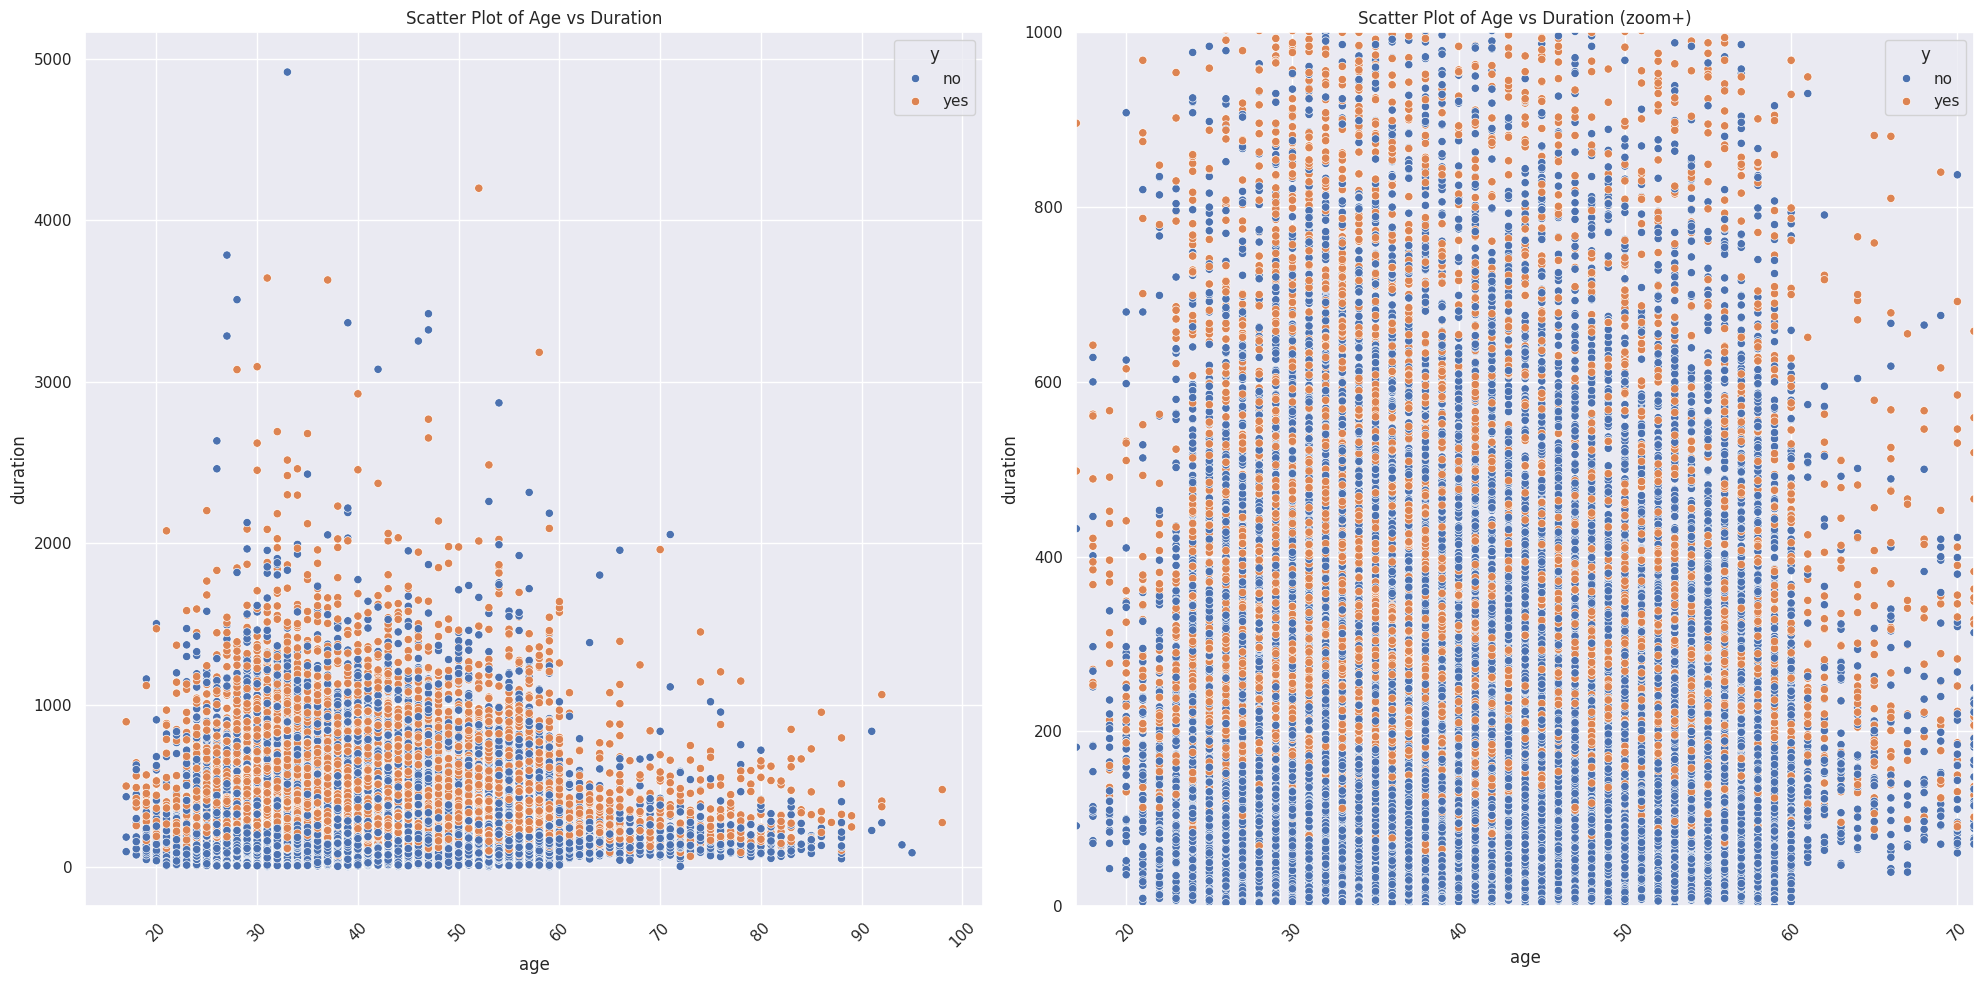

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax = sns.scatterplot(x='age', y='duration', data=df, hue='y', ax=axes[0])
axes[0].set_title('Scatter Plot of Age vs Duration')
axes[0].tick_params(axis='x', rotation=45)

ax = sns.scatterplot(x='age', y='duration', data=df, hue='y',  ax=axes[1])
axes[1].set_title('Scatter Plot of Age vs Duration (zoom+)')
axes[1].tick_params(axis='x', rotation=45)
plt.ylim(0,1000)
plt.xlim(17, 71)
plt.tight_layout()
plt.show()

Це зображення ілюструє взаємозв’язок між віком (age) і тривалістю контакту (duration) клієнтів, враховуючи результат підписки на депозит (y).  

Більшість точок зосереджена в діапазоні коротких контактів (менше 1000 секунд), незалежно від віку клієнтів. Це свідчить про те, що значна частина взаємодій є нетривалою.  

ScatterPlot показує відсутність чіткої залежності між віком і тривалістю контакту – клієнти будь-якого віку можуть мати як короткі, так і тривалі розмови, а також як підписувати, так і відмовлятися від депозиту.  

Ліва діаграма демонструє, що клієнти, які оформили підписку, зазвичай мають довші контакти (часто понад 500 секунд), що може вказувати на важливість тривалих розмов для успішного укладання договору.  

На правій діаграмі детальніше розглядається сегмент із тривалістю контакту до 1000 секунд. Видно, що серед тривалих розмов більше жовтих точок (успішних підписок), що підтверджує попередній висновок.  

Також варто відзначити, що контакти тривалістю до 200 секунд найчастіше закінчуються відмовою від підписки. Це свідчить про низьку ефективність коротких розмов у досягненні бажаного для банку результату.

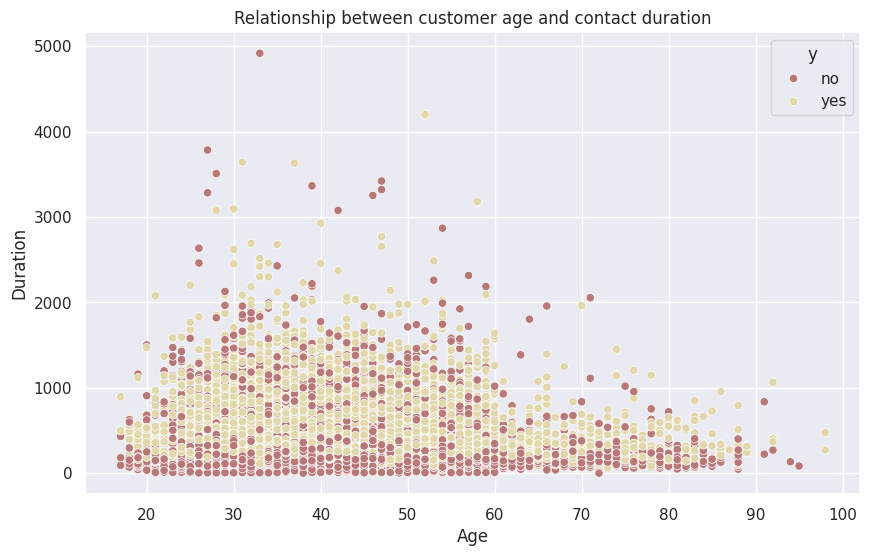

Pearsons correlation coefficient: -0.0009
p-value: 0.8605


In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink')

plt.title('Relationship between customer age and contact duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

correlation, p_value = pearsonr(df['age'], df['duration'])

print(f'Pearsons correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}') #p-значення < 0.05 - статистично значущa.

Коефіцієнт кореляції Пірсона ≈ -0.0009

Це майже нульове значення, що означає відсутність лінійного зв’язку між віком клієнта (age) і тривалістю контакту (duration).
Тобто вік клієнта не впливає на тривалість розмови.
p-value = 0.8605

Це значно більше за 0.05, що означає, що кореляція не є статистично значущою.
Тому ми не можемо відкидати нульову гіпотезу, яка стверджує, що між віком і тривалістю контакту немає зв’язку.
Графік підтверджує результати

Точки розташовані хаотично, без чіткої тенденції або тренду.
Жовті точки (yes — клієнти, які погодились на депозит) та коричневі точки (no) розподілені без явного патерну.
Загальний висновок:
Вік клієнта не є предиктором тривалості дзвінка. Можливо, інші фактори (наприклад, тип роботи, попередній досвід з банком тощо) впливають на те, як довго клієнт говорить із менеджером.

### Як пов'язані ознаки education та housing?

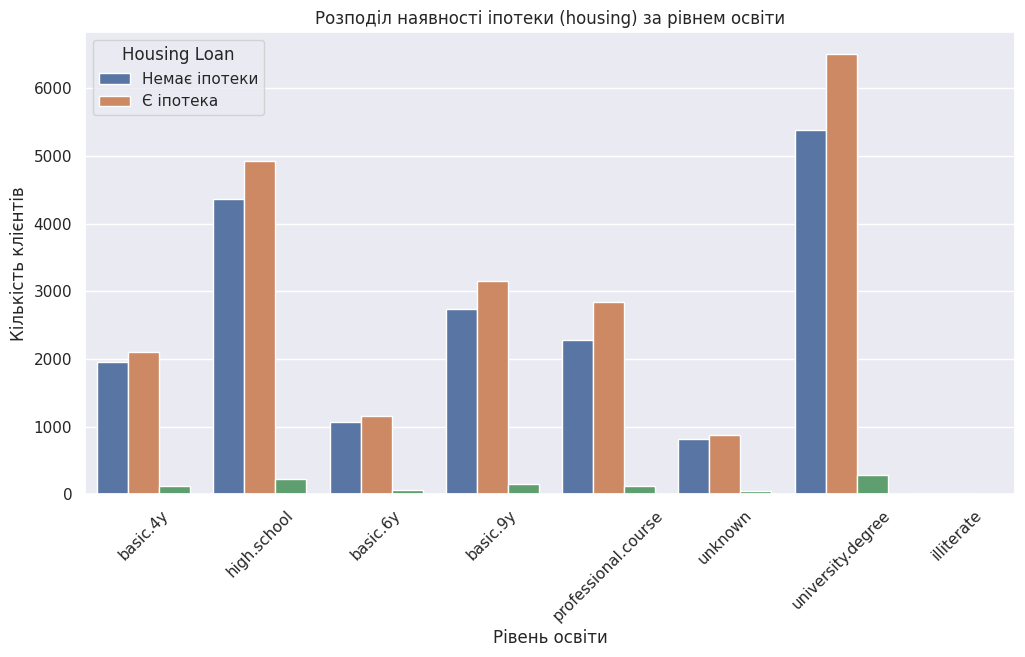

In [50]:
plt.figure(figsize=(12, 6))

sns.countplot(x='education', hue='housing', data=df)

plt.title('Розподіл наявності іпотеки (housing) за рівнем освіти')
plt.xlabel('Рівень освіти')
plt.ylabel('Кількість клієнтів')
plt.legend(title='Housing Loan', labels=['Немає іпотеки', 'Є іпотека'])
plt.xticks(rotation=45)
plt.show()

-  Люди з вищою освітою частіше беруть іпотеку, що може свідчити про кращий фінансовий стан та більшу ймовірність отримання кредиту.
-  Особи з низьким рівнем освіти або невідомим статусом рідше мають іпотеку, можливо, через фінансові обмеження.
-  Загалом, освіта впливає на ймовірність наявності іпотеки, але цей взаємозв'язок не є дуже сильним.

Які ще інсайти можна знайти в наявних даних? Творче завдання.

Знаходження значень, які мають найбільший вплив на цільову змінну:

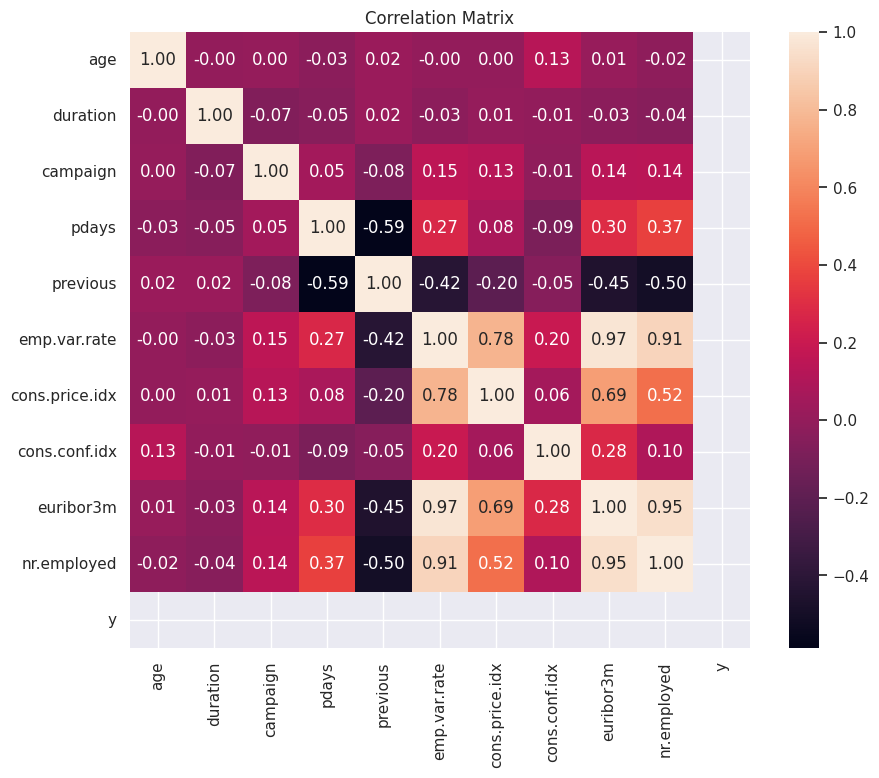

In [53]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()